In [1]:
import pandas as pd
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter, defaultdict
from nltk.tokenize import word_tokenize


nltk.download('punkt')

positive_texts = [
    "I absolutely loved the experience.",
    "The food was fantastic and well-presented.",
    "Such a beautiful and heartwarming movie.",
    "I'm impressed with the excellent service.",
    "The concert was mind-blowing and energetic.",
    "Amazing acting and brilliant storyline.",
    "My vacation was peaceful and unforgettable.",
    "I enjoyed every moment of this trip.",
    "Great product quality and fast delivery.",
    "The hotel room was clean and cozy.",
    "I'm thrilled about the new update.",
    "The staff was extremely friendly and helpful.",
    "The gameplay was engaging and addictive.",
    "Spectacular visuals and sound design.",
    "It was a delightful dining experience.",
    "Absolutely love this gadget!",
    "Highly recommend this book.",
    "Best movie I’ve seen this year.",
    "I feel refreshed after this spa visit.",
    "This course was insightful and useful.",
]

negative_texts = [
    "The experience was awful and frustrating.",
    "I'm really disappointed with the service.",
    "The movie was boring and too long.",
    "This product broke after one use.",
    "Poor customer support and rude staff.",
    "The food was cold and tasteless.",
    "It was a waste of time and money.",
    "I regret buying this item.",
    "Traffic was terrible and stressful.",
    "The gameplay was dull and repetitive.",
    "Extremely overpriced for what you get.",
    "Awful direction and weak performances.",
    "The staff was unhelpful and unfriendly.",
    "The update made things worse.",
    "The visuals were cheap and sloppy.",
    "I hated every minute of this film.",
    "The hotel room was dirty and cramped.",
    "Shipping took forever and arrived broken.",
    "Terrible experience overall.",
    "Would not recommend this to anyone.",
]

positive_samples = random.choices(positive_texts, k=125)
negative_samples = random.choices(negative_texts, k=125)
texts = positive_samples + negative_samples
labels = ['positive'] * 150 + ['negative'] * 150

combined = list(zip(texts, labels))
random.shuffle(combined)
texts, labels = zip(*combined)


[nltk_data] Downloading package punkt to C:\Users\Fayez
[nltk_data]     Siddiqui\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.82      0.79        28
    positive       0.89      0.85      0.87        47

    accuracy                           0.84        75
   macro avg       0.83      0.84      0.83        75
weighted avg       0.84      0.84      0.84        75


Confusion Matrix:
 [[23  5]
 [ 7 40]]


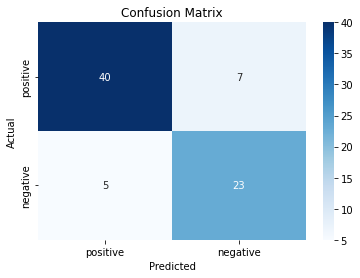


TF-IDF Matrix Shape: (250, 259) (documents x n-gram features)


In [2]:

vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words='english')
X = vectorizer.fit_transform(texts)
feature_names = vectorizer.get_feature_names_out()

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 📉 Optional: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nTF-IDF Matrix Shape: {X.shape} (documents x n-gram features)")


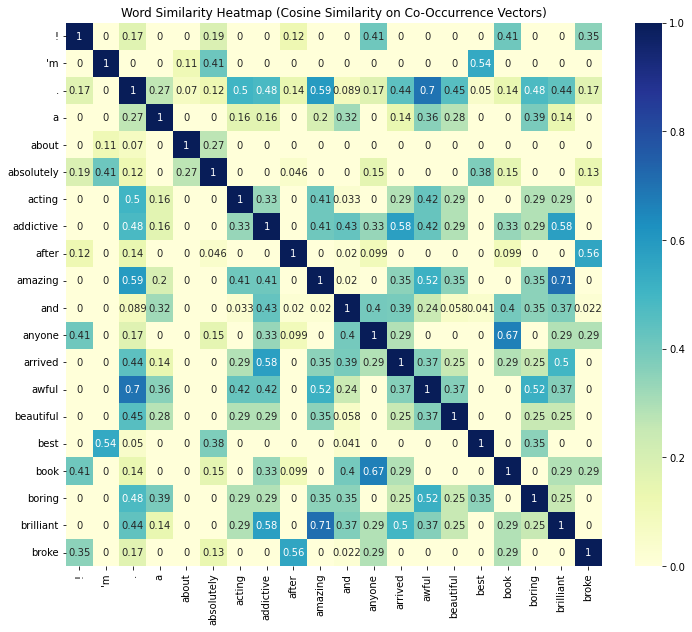

In [3]:
tokenized_docs = [word_tokenize(doc.lower()) for doc in texts]

vocab = set(word for doc in tokenized_docs for word in doc)
vocab = sorted(vocab)
word2idx = {word: idx for idx, word in enumerate(vocab)}

window_size = 2
co_matrix = np.zeros((len(vocab), len(vocab)))

for tokens in tokenized_docs:
    for i, word in enumerate(tokens):
        word_idx = word2idx[word]
        start = max(i - window_size, 0)
        end = min(i + window_size + 1, len(tokens))
        for j in range(start, end):
            if i != j:
                context_word = tokens[j]
                context_idx = word2idx[context_word]
                co_matrix[word_idx, context_idx] += 1

similarity_matrix = cosine_similarity(co_matrix)

similarity_df = pd.DataFrame(similarity_matrix, index=vocab, columns=vocab)

top_words = vocab[:20]  # you can pick top-N frequent words if desired
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df.loc[top_words, top_words], annot=True, cmap='YlGnBu')
plt.title("Word Similarity Heatmap (Cosine Similarity on Co-Occurrence Vectors)")
plt.show()

